<center>
  <h1 style="background-color:green; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:2px solid black;">STOCK MARKET PREDICTION</h1>
</center>

<center style= "size=800px;"><img src = "https://images.news18.com/ibnkhabar/uploads/2022/09/share-market-down-12-9-shutterstock-166384089216x9.jpg"style></center>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns                                                                                                                                                                                                                             
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#This line uses the pandas function read_csv() to read data from a CSV file named 'filename.csv' and store it in a DataFrame called "df". A DataFrame is a primary data structure in pandas that allows you to store and manipulate tabular data.
df=pd.read_csv("/kaggle/input/stock-market-prediction/stock market prediction123.csv")
df

,Timestamp,Open,High,Low,Close,Volume,Company Name
0,3/2/2010 9:01,8826.90,8856.95,8826.90,8839.80,6316783,Amazon
1,3/2/2010 9:02,8840.75,8853.90,8832.80,8852.30,6316784,Amazon
2,3/2/2010 9:03,8855.70,8855.70,8844.65,8846.65,6316785,Amazon
3,3/2/2010 9:04,8843.85,8850.70,8843.75,8846.70,6316786,Amazon
4,3/2/2010 9:05,8846.40,8846.40,8837.75,8841.60,6316787,Amazon
...,...,...,...,...,...,...,...
999,3/4/2010 12:40,9003.70,9008.15,9003.70,9008.15,6317782,myntra
1000,3/4/2010 12:41,9006.65,9010.10,9006.00,9009.10,6317783,myntra
1001,3/4/2010 12:42,9009.45,9010.65,9008.45,9010.60,6317784,myntra
1002,3/4/2010 12:43,9010.10,9010.95,9008.15,9010.90,6317785,myntra


In [3]:
# df.shape attribute provides information about the dimensions of the DataFrame df. It returns a tuple representing the number of rows and columns in the DataFrame.
df.shape

(1004, 7)

In [4]:
#generates descriptive statistics for a DataFrame. It calculates and displays a summary of various statistical measures for each numeric column in the DataFrame.
df.describe

<bound method NDFrame.describe of            Timestamp     Open     High      Low    Close   Volume Company Name
0      3/2/2010 9:01  8826.90  8856.95  8826.90  8839.80  6316783       Amazon
1      3/2/2010 9:02  8840.75  8853.90  8832.80  8852.30  6316784       Amazon
2      3/2/2010 9:03  8855.70  8855.70  8844.65  8846.65  6316785       Amazon
3      3/2/2010 9:04  8843.85  8850.70  8843.75  8846.70  6316786       Amazon
4      3/2/2010 9:05  8846.40  8846.40  8837.75  8841.60  6316787       Amazon
...              ...      ...      ...      ...      ...      ...          ...
999   3/4/2010 12:40  9003.70  9008.15  9003.70  9008.15  6317782       myntra
1000  3/4/2010 12:41  9006.65  9010.10  9006.00  9009.10  6317783       myntra
1001  3/4/2010 12:42  9009.45  9010.65  9008.45  9010.60  6317784       myntra
1002  3/4/2010 12:43  9010.10  9010.95  9008.15  9010.90  6317785       myntra
1003  3/4/2010 12:44  9010.30  9011.20  9006.05  9007.35  6317786       myntra

[1004 rows x 7 co

In [5]:
# how many columns exists in our dataframe
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Company Name'], dtype='object')

In [6]:
#provides a concise summary of the DataFrame's basic information. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     1004 non-null   object 
 1   Open          1004 non-null   float64
 2   High          1004 non-null   float64
 3   Low           1004 non-null   float64
 4   Close         1004 non-null   float64
 5   Volume        1004 non-null   int64  
 6   Company Name  1004 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 55.0+ KB


<Axes: >

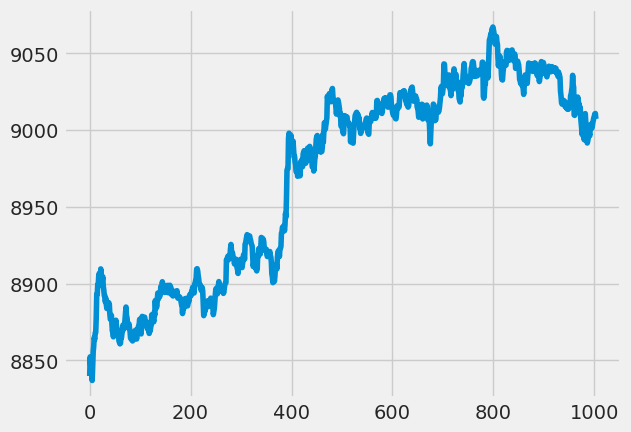

In [7]:
# show plot
df.Close.plot()

# Exploratory Data Analysis

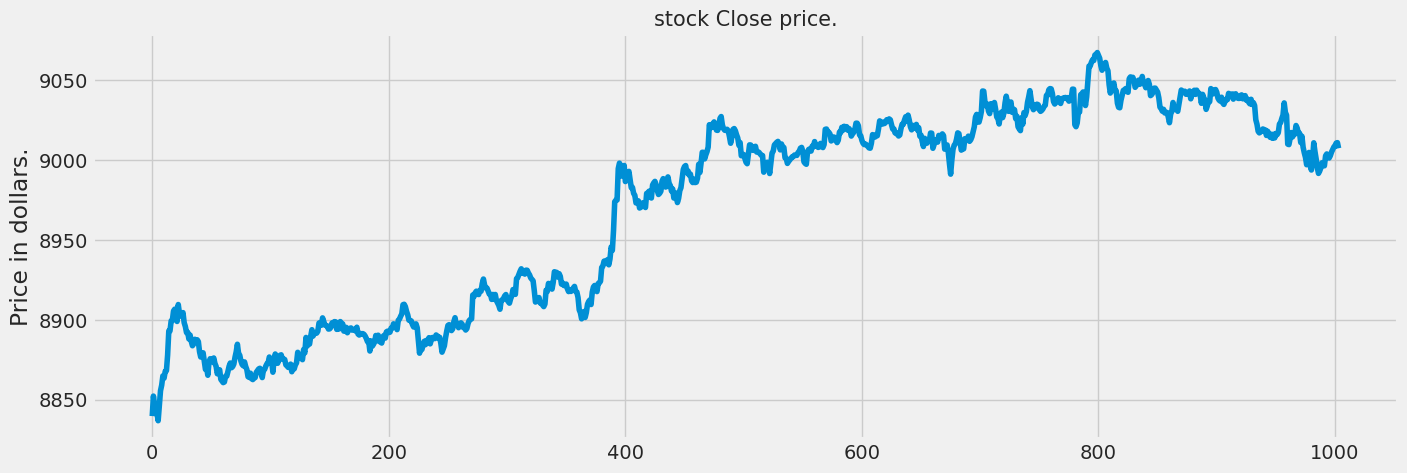

In [8]:
#While performing the EDA of the  Stock Price data we will analyze how prices of the stock have moved over the period of time and how the end of the quarters affects the prices of the stock.
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('stock Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [9]:
#top 5 dataframe record 
df.head()

,Timestamp,Open,High,Low,Close,Volume,Company Name
0,3/2/2010 9:01,8826.90,8856.95,8826.90,8839.80,6316783,Amazon
1,3/2/2010 9:02,8840.75,8853.90,8832.80,8852.30,6316784,Amazon
2,3/2/2010 9:03,8855.70,8855.70,8844.65,8846.65,6316785,Amazon
3,3/2/2010 9:04,8843.85,8850.70,8843.75,8846.70,6316786,Amazon
4,3/2/2010 9:05,8846.40,8846.40,8837.75,8841.60,6316787,Amazon


In [10]:
df[df['Close'] == df['Company Name']].shape

(0, 7)

In [11]:
df.isnull().sum()

Timestamp       0
Open            0
High            0
Low             0
Close           0
Volume          0
Company Name    0
dtype: int64

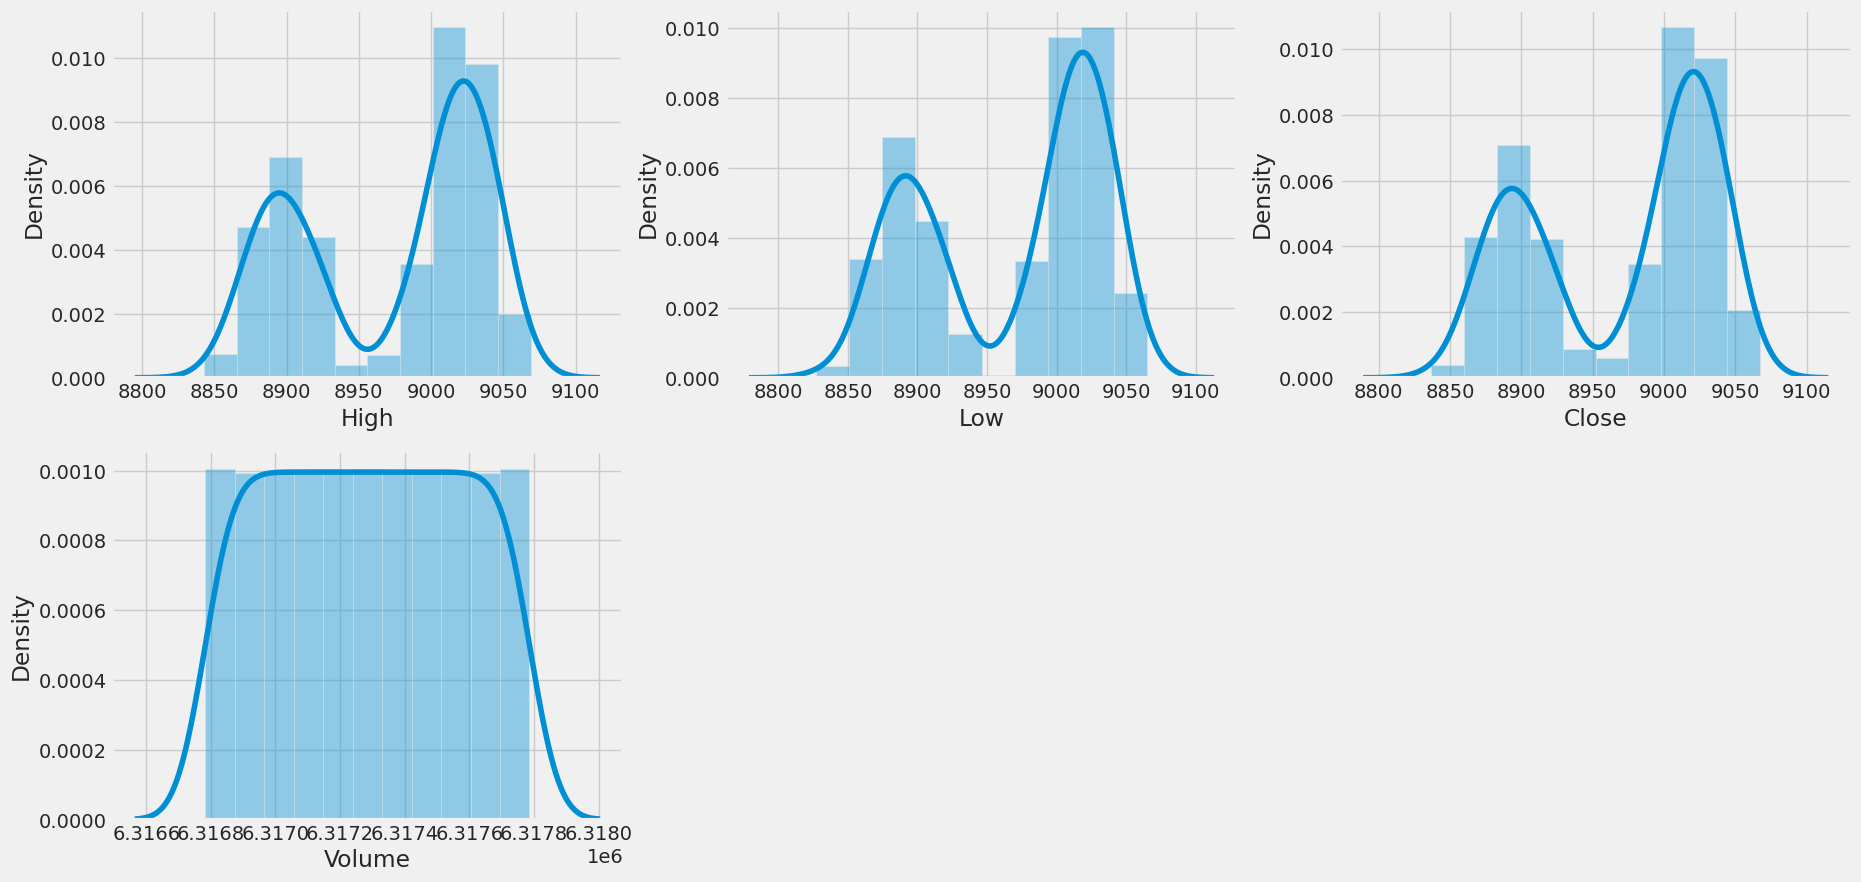

In [12]:
#pyplot and distplot
import matplotlib.pyplot as plt
import seaborn as sb

features = [ 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sb.distplot(df[col])

plt.show()

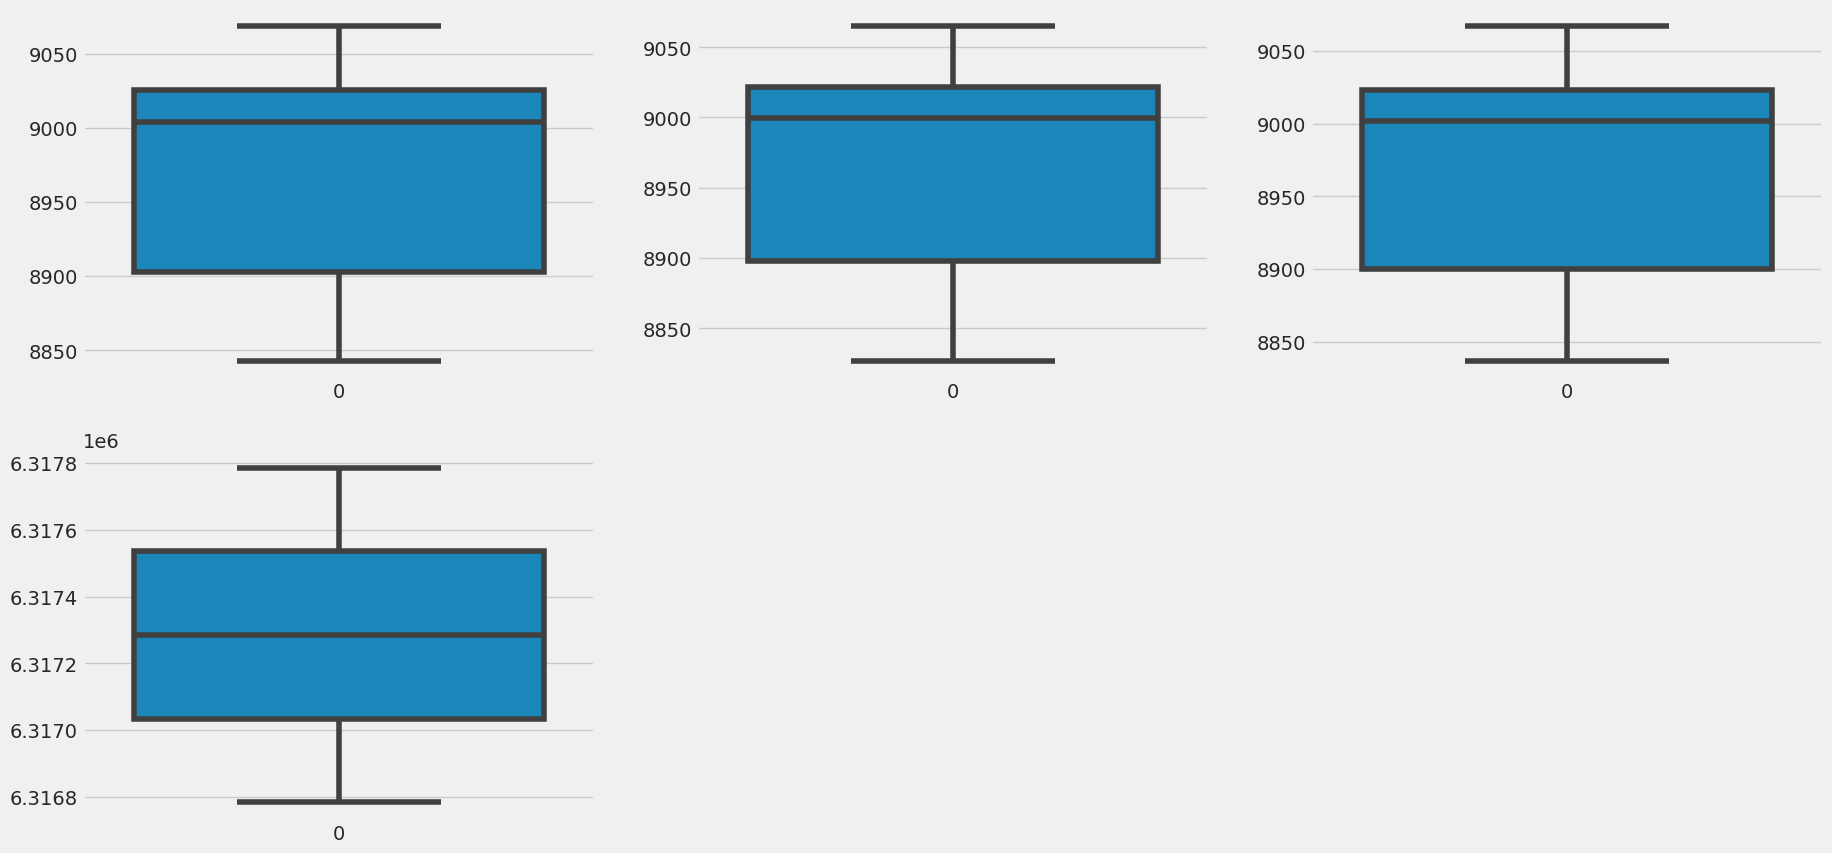

In [13]:
#show subplots used in the context of plotting and data visualization with the Matplotlib library in Python.
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [14]:
df['Timestamp'] = pd.to_datetime(df['Timestamp']).astype(int) // 10**9
df['Timestamp']

0       1267520460
1       1267520520
2       1267520580
3       1267520640
4       1267520700
           ...    
999     1267706400
1000    1267706460
1001    1267706520
1002    1267706580
1003    1267706640
Name: Timestamp, Length: 1004, dtype: int64

In [15]:
#provides information about the data types of each column in the DataFrame df.
df.dtypes

Timestamp         int64
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Company Name     object
dtype: object

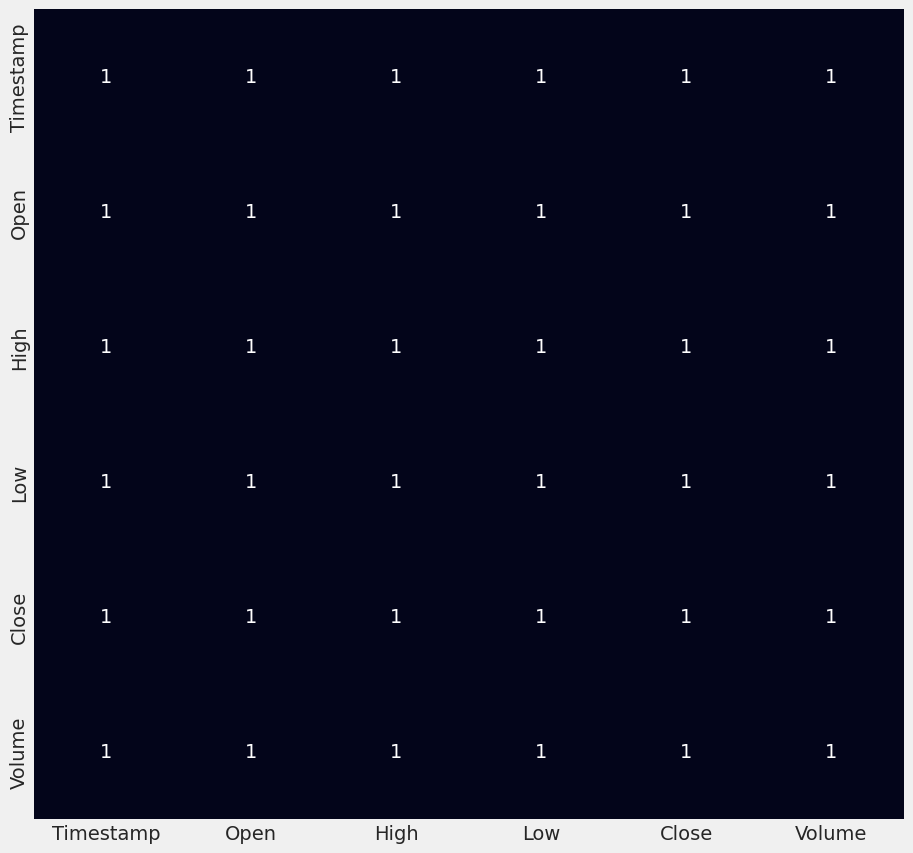

In [16]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

# 

In [17]:
df = pd.DataFrame(df)

# Convert the first 1004 rows of the column to strings
df.loc[:1003, 'Timestamp'] = df.loc[:1003, 'Timestamp'].astype(str)

print(df)

       Timestamp     Open     High      Low    Close   Volume Company Name
0     1267520460  8826.90  8856.95  8826.90  8839.80  6316783       Amazon
1     1267520520  8840.75  8853.90  8832.80  8852.30  6316784       Amazon
2     1267520580  8855.70  8855.70  8844.65  8846.65  6316785       Amazon
3     1267520640  8843.85  8850.70  8843.75  8846.70  6316786       Amazon
4     1267520700  8846.40  8846.40  8837.75  8841.60  6316787       Amazon
...          ...      ...      ...      ...      ...      ...          ...
999   1267706400  9003.70  9008.15  9003.70  9008.15  6317782       myntra
1000  1267706460  9006.65  9010.10  9006.00  9009.10  6317783       myntra
1001  1267706520  9009.45  9010.65  9008.45  9010.60  6317784       myntra
1002  1267706580  9010.10  9010.95  9008.15  9010.90  6317785       myntra
1003  1267706640  9010.30  9011.20  9006.05  9007.35  6317786       myntra

[1004 rows x 7 columns]


In [18]:
df.reset_index(drop=True, inplace=True)
df.fillna(df.mean(), inplace=True)
df.head()

,Timestamp,Open,High,Low,Close,Volume,Company Name
0,1267520460,8826.90,8856.95,8826.90,8839.80,6316783,Amazon
1,1267520520,8840.75,8853.90,8832.80,8852.30,6316784,Amazon
2,1267520580,8855.70,8855.70,8844.65,8846.65,6316785,Amazon
3,1267520640,8843.85,8850.70,8843.75,8846.70,6316786,Amazon
4,1267520700,8846.40,8846.40,8837.75,8841.60,6316787,Amazon


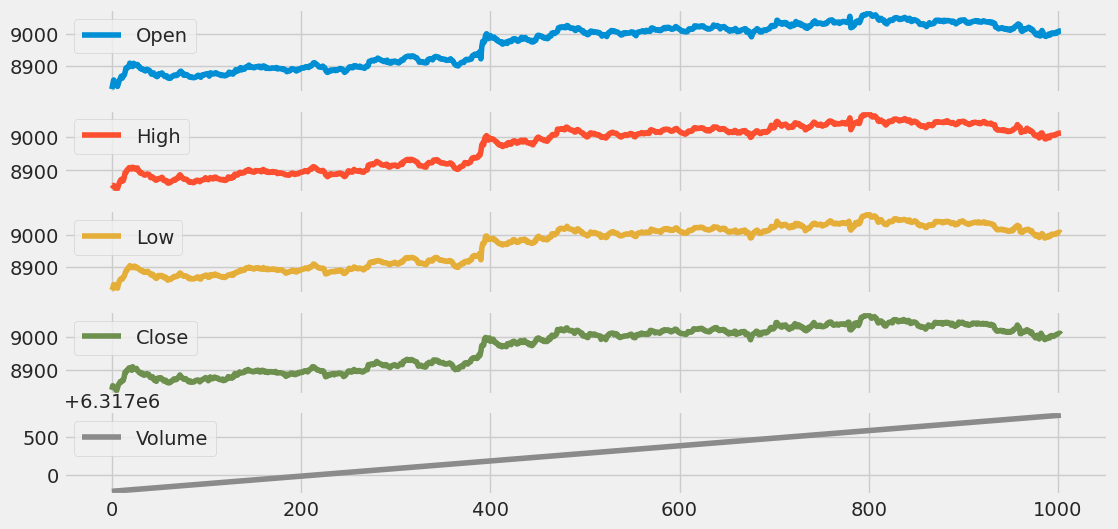

       Timestamp     Open     High      Low    Close   Volume Company Name
0     1267520460  8826.90  8856.95  8826.90  8839.80  6316783       Amazon
1     1267520520  8840.75  8853.90  8832.80  8852.30  6316784       Amazon
2     1267520580  8855.70  8855.70  8844.65  8846.65  6316785       Amazon
3     1267520640  8843.85  8850.70  8843.75  8846.70  6316786       Amazon
4     1267520700  8846.40  8846.40  8837.75  8841.60  6316787       Amazon
...          ...      ...      ...      ...      ...      ...          ...
999   1267706400  9003.70  9008.15  9003.70  9008.15  6317782       myntra
1000  1267706460  9006.65  9010.10  9006.00  9009.10  6317783       myntra
1001  1267706520  9009.45  9010.65  9008.45  9010.60  6317784       myntra
1002  1267706580  9010.10  9010.95  9008.15  9010.90  6317785       myntra
1003  1267706640  9010.30  9011.20  9006.05  9007.35  6317786       myntra

[1004 rows x 7 columns]


Timestamp       0
Open            0
High            0
Low             0
Close           0
Volume          0
Company Name    0
dtype: int64

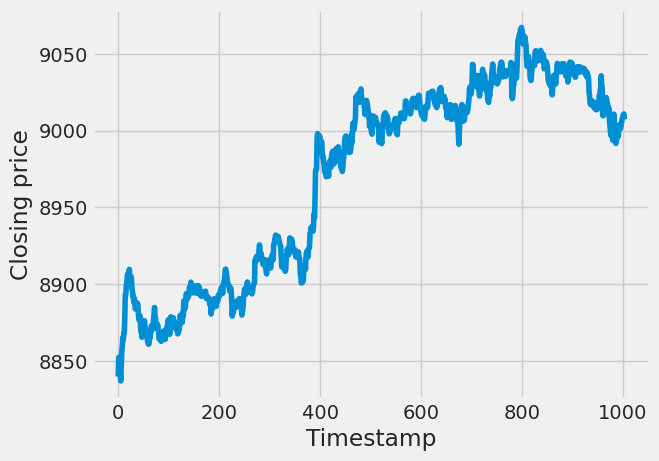

In [19]:
df.shape
df.size
df.describe(include='all').T
df.dtypes
df.nunique()
ma_day = [10,50,100]
df.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
plt.plot(df['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = df
print(df)

df.isnull().sum()

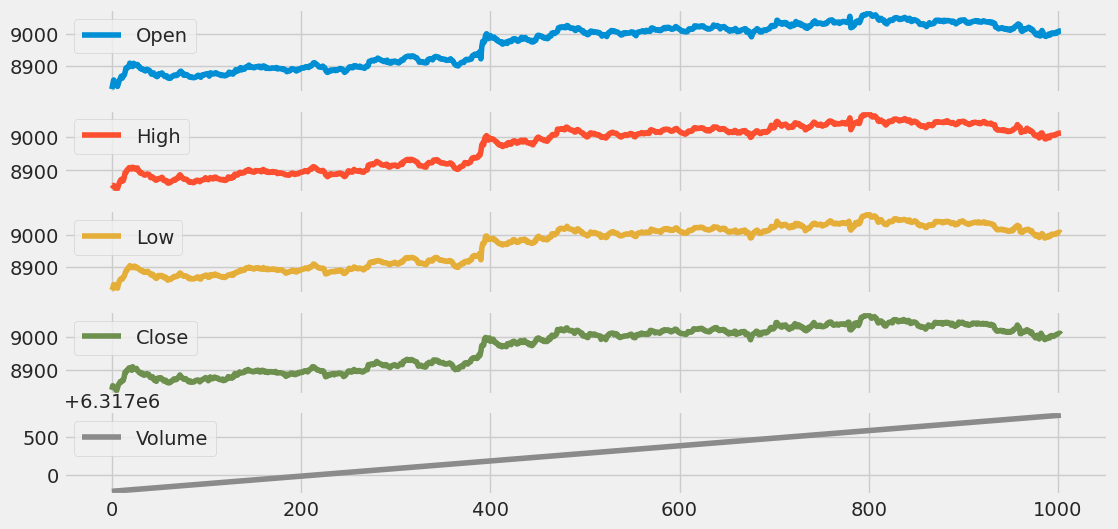

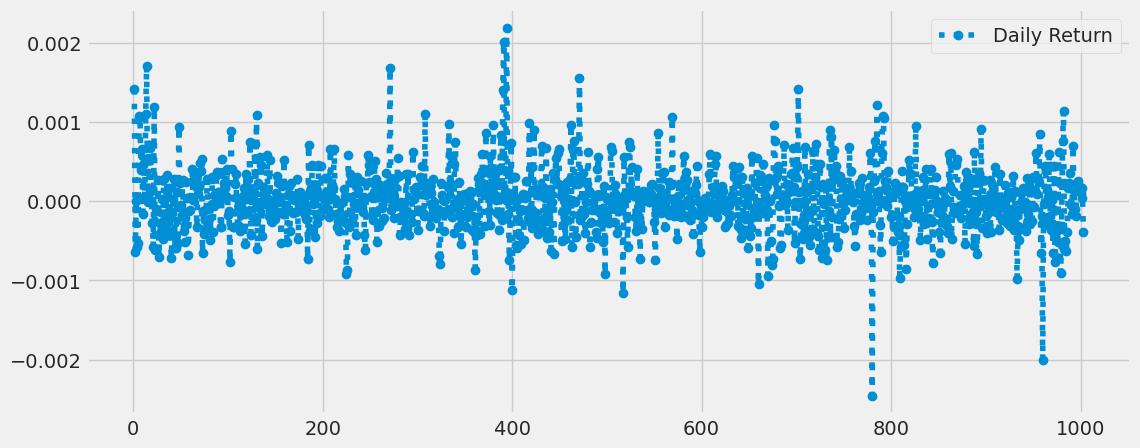

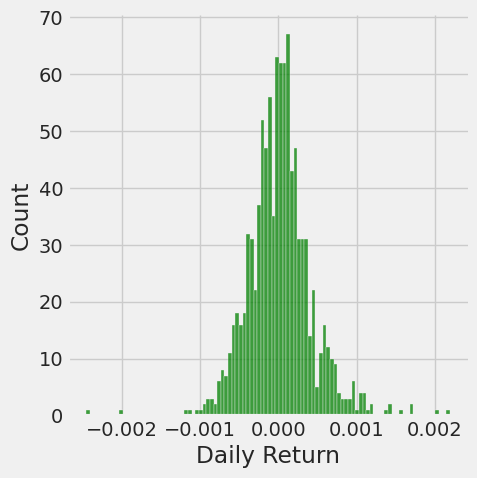

       Timestamp     Open     High      Low    Close   Volume Company Name  \
0     1267520460  8826.90  8856.95  8826.90  8839.80  6316783       Amazon   
1     1267520520  8840.75  8853.90  8832.80  8852.30  6316784       Amazon   
2     1267520580  8855.70  8855.70  8844.65  8846.65  6316785       Amazon   
3     1267520640  8843.85  8850.70  8843.75  8846.70  6316786       Amazon   
4     1267520700  8846.40  8846.40  8837.75  8841.60  6316787       Amazon   
...          ...      ...      ...      ...      ...      ...          ...   
999   1267706400  9003.70  9008.15  9003.70  9008.15  6317782       myntra   
1000  1267706460  9006.65  9010.10  9006.00  9009.10  6317783       myntra   
1001  1267706520  9009.45  9010.65  9008.45  9010.60  6317784       myntra   
1002  1267706580  9010.10  9010.95  9008.15  9010.90  6317785       myntra   
1003  1267706640  9010.30  9011.20  9006.05  9007.35  6317786       myntra   

      MA for 10 days  MA for 50 days  MA for 100 days  Daily Re

Timestamp          0
Open               0
High               0
Low                0
Close              0
Volume             0
Company Name       0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

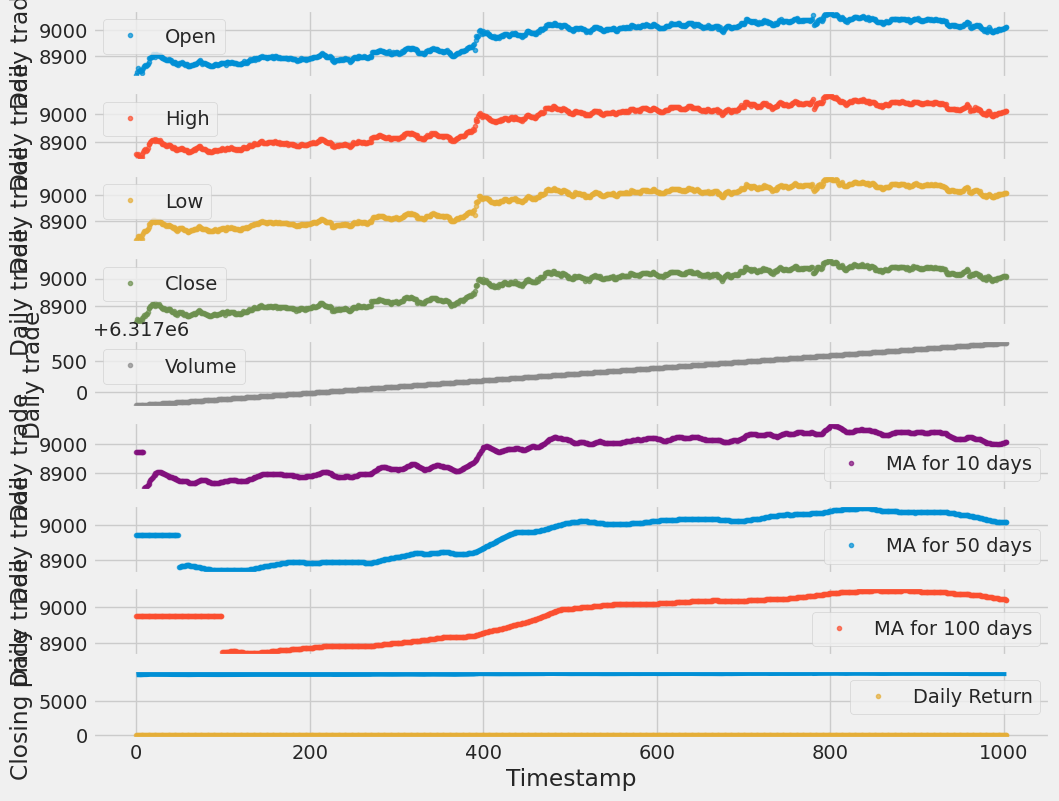

In [20]:
df.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

df.shape
df.size
df.describe(include='all').T
df.dtypes
df.nunique()

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    df[column_name]=pd.DataFrame.rolling(df['Close'],ma).mean()

df['Daily Return'] = df['Close'].pct_change()
# plot the daily return percentage
df['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(df['Daily Return'].dropna(),bins=100,color='green')
plt.show()



df.reset_index(drop=True, inplace=True)
df.fillna(df.mean(), inplace=True)
df.head()

df.nunique()

df.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = df[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(df['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = df
print(df)

df.isnull().sum()

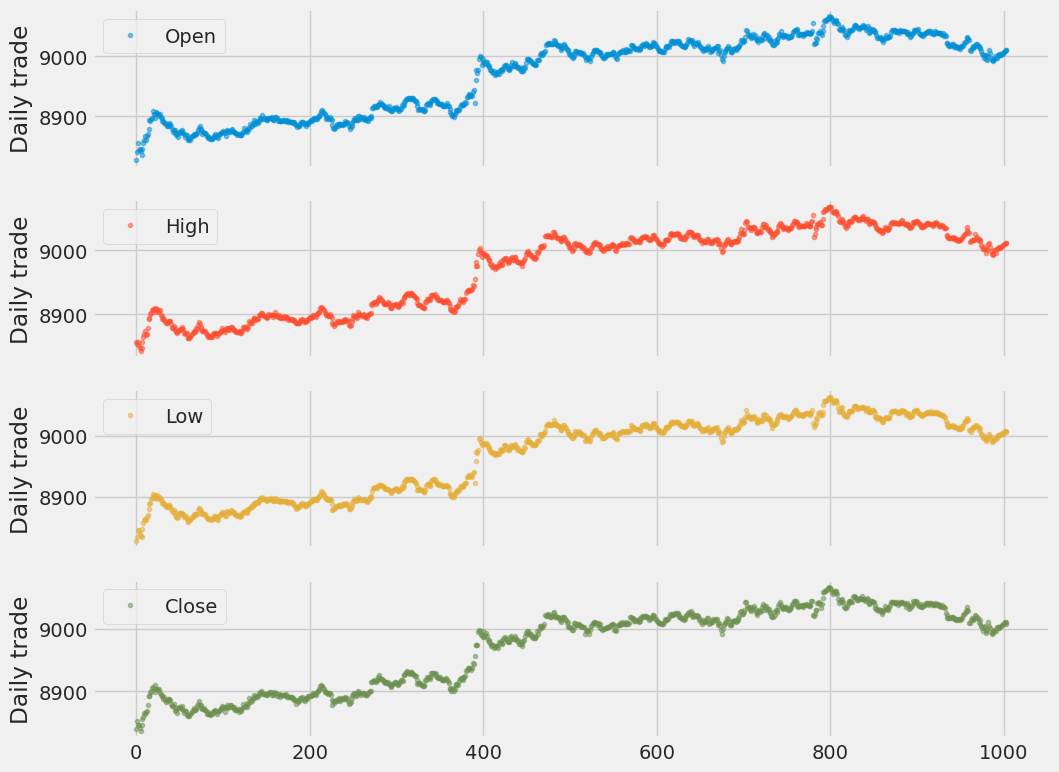

In [21]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

       Timestamp     Open     High      Low    Close   Volume Company Name  \
0     1267520460  8826.90  8856.95  8826.90  8839.80  6316783       Amazon   
1     1267520520  8840.75  8853.90  8832.80  8852.30  6316784       Amazon   
2     1267520580  8855.70  8855.70  8844.65  8846.65  6316785       Amazon   
3     1267520640  8843.85  8850.70  8843.75  8846.70  6316786       Amazon   
4     1267520700  8846.40  8846.40  8837.75  8841.60  6316787       Amazon   
...          ...      ...      ...      ...      ...      ...          ...   
999   1267706400  9003.70  9008.15  9003.70  9008.15  6317782       myntra   
1000  1267706460  9006.65  9010.10  9006.00  9009.10  6317783       myntra   
1001  1267706520  9009.45  9010.65  9008.45  9010.60  6317784       myntra   
1002  1267706580  9010.10  9010.95  9008.15  9010.90  6317785       myntra   
1003  1267706640  9010.30  9011.20  9006.05  9007.35  6317786       myntra   

      MA for 10 days  MA for 50 days  MA for 100 days  Daily Re

,count,mean,std,min,25%,50%,75%,max
Open,1004.0,8.970596e+03,63.933447,8.826900e+03,8.899800e+03,9.001800e+03,9.023763e+03,9.066550e+03
High,1004.0,8.972813e+03,63.793330,8.842950e+03,8.902825e+03,9.003900e+03,9.025725e+03,9.068950e+03
Low,1004.0,8.968738e+03,63.883892,8.826900e+03,8.897950e+03,8.999950e+03,9.022013e+03,9.065200e+03
Close,1004.0,8.970849e+03,63.742484,8.836900e+03,8.900138e+03,9.001825e+03,9.023200e+03,9.067250e+03
Volume,1004.0,6.317284e+06,289.974137,6.316783e+06,6.317034e+06,6.317284e+06,6.317535e+06,6.317786e+06
MA for 10 days,1004.0,8.971246e+03,62.947514,8.849010e+03,8.901856e+03,9.002237e+03,9.022962e+03,9.063235e+03
MA for 50 days,1004.0,8.972430e+03,60.845997,8.869563e+03,8.908112e+03,9.003659e+03,9.021495e+03,9.050714e+03
MA for 100 days,1004.0,8.973795e+03,57.913934,8.873179e+03,8.914804e+03,8.994839e+03,9.021372e+03,9.044602e+03
Daily Return,1004.0,1.880433e-05,0.000409,-2.454585e-03,-2.102357e-04,1.403266e-05,2.227169e-04,2.189415e-03


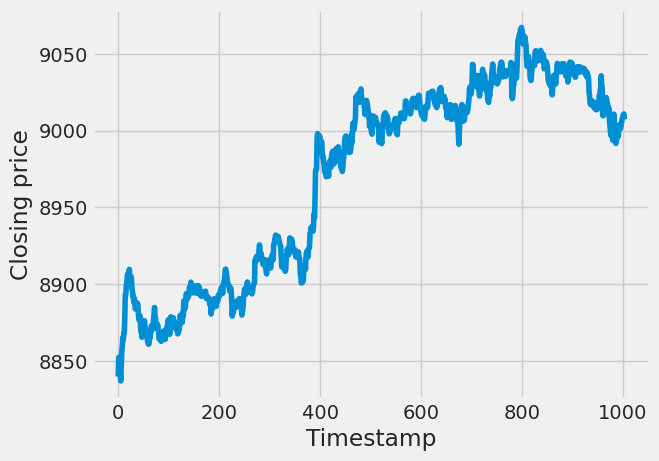

In [22]:
plt.plot(df['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = df
print(df)

df.describe().transpose()

<center>
  <h1 style="background-color:PINK; color:BLACK; font-size:40px; font-weight:bold; font-family:Times New Roman; border:2px solid black;">THANK YOU</h1>
</center>